In [5]:
import re
from simhash import Simhash
import pandas as pd

def extract_features(s):
    width = 3
    s = s.lower()
    s = re.sub(r'[^\w]+', '', s)
    return [s[i:i + width] for i in range(max(len(s) - width + 1, 1))]

def get_simhash(txt):
    features=extract_features(txt)
    return Simhash(features).value

def get_similarity_measure(text_1,text_2,simhash_1,simhash_2):
    distance = bin(simhash_1 ^ simhash_2).count('1')
    return distance

In [6]:
df = pd.read_csv("dataset.csv" ,  encoding="latin-1")

In [7]:
df1 = df[df['label'] == 'key']

In [8]:
df1

,Unnamed: 0,filename,text,label
0,0,1000176487-1286007669-ArrivalNotice-5-7-11h57m...,vessel / voyage :,key
2,2,1000176487-1286007669-ArrivalNotice-5-7-11h57m...,fax :,key
4,4,1000176487-1286007669-ArrivalNotice-5-7-11h57m...,house b / l,key
6,6,1000176487-1286007669-ArrivalNotice-5-7-11h57m...,commodity :,key
8,8,1000176487-1286007669-ArrivalNotice-5-7-11h57m...,place of receipt,key
...,...,...,...,...
36848,36848,test_CI.png,covering shipment of,key
36850,36850,test_CI.png,country of origin :,key
36852,36852,test_CI.png,customer name :,key
36854,36854,test_CI.png,customer po number :,key


In [9]:
dic = {}

c = 0
for line in df1['text']:
    line = str(line)
    dic[line] = get_simhash(line)

In [10]:
dic

{'vessel / voyage :': 334456430575460726,
 'fax :': 10787291729392331851,
 'house b / l': 2784739807766383312,
 'commodity :': 17774960583947560196,
 'place of receipt': 14641492733923260475,
 'volume :': 878501675404604203,
 'invoice due date': 12514419253868287799,
 'bol type :': 7149668027380043812,
 'invoice date': 16693830076317341495,
 'email :': 18169071554185638057,
 'tel :': 4601558118689464221,
 'eta at port :': 14250922744677509190,
 'container no :': 11811175529650837677,
 'consignee': 11714600325734623338,
 'shipper :': 18416034417282085939,
 'etd :': 15972190835318056910,
 'invoice no': 17288727440132241201,
 'p o no :': 721289613704462368,
 'attn :': 506957396532535808,
 'port of discharge': 7007708505289747610,
 'prepared by': 3703720456053925,
 'file no :': 4628325078835151112,
 'master b / l': 14422056836293486632,
 'final destination :': 16776066971111600820,
 'port of loading :': 15006916774099603354,
 'cargo location :': 15966792984932614425,
 'cargo type :': 11777

In [12]:
tl1 = []
tl2 = []
dist = []

for t in dic:
    for x in dic:
        if(x!=t):
            dis = get_similarity_measure(t,x,dic[t],dic[x])
            tl1.append(t)
            tl2.append(x)
            dist.append(dis)
            
df = pd.DataFrame()
df["text1"]=tl1
df["text2"]=tl2
df["distance"]=dist

In [13]:
df

,text1,text2,distance
0,vessel / voyage :,fax :,32
1,vessel / voyage :,house b / l,25
2,vessel / voyage :,commodity :,26
3,vessel / voyage :,place of receipt,36
4,vessel / voyage :,volume :,23
...,...,...,...
10217607,covering shipment of,mpms gcas #,24
10217608,covering shipment of,supplier location,28
10217609,covering shipment of,superseded :,33
10217610,covering shipment of,iss no,31


In [ ]:
df.describe()

In [14]:
import pandas as pd
import seaborn as sns

<AxesSubplot: xlabel='distance', ylabel='Density'>

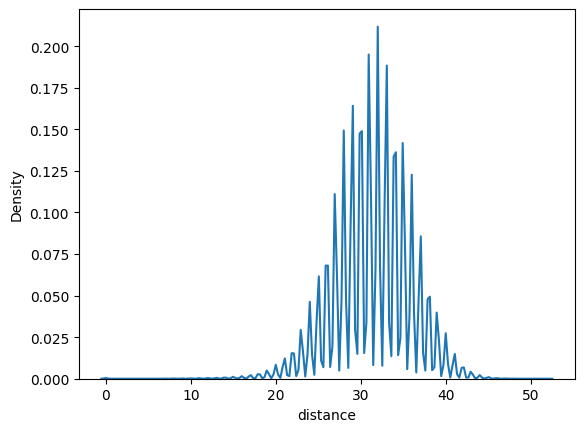

In [15]:
sns.kdeplot(df['distance'])

<AxesSubplot: >

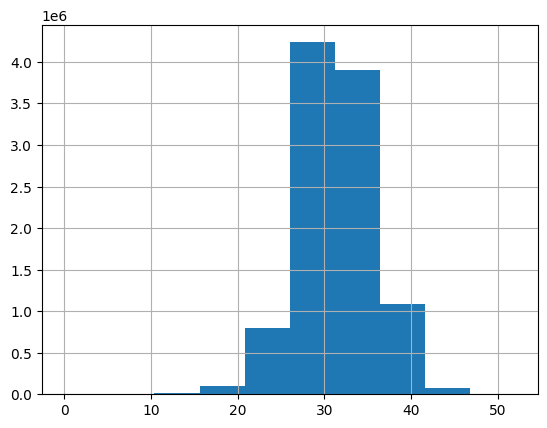

In [16]:
df['distance'].hist()

In [17]:
df1 = df[df["distance"] >=42]

In [18]:
df1

,text1,text2,distance
313,vessel / voyage :,i t hub,42
360,vessel / voyage :,ship to :,42
412,vessel / voyage :,deliver to,42
446,vessel / voyage :,estimated,42
583,vessel / voyage :,number of original,42
...,...,...,...
10216927,covering shipment of,your reference no,44
10216960,covering shipment of,company registration no :,42
10217202,covering shipment of,contactperson :,43
10217260,covering shipment of,valuta / currency,42


In [19]:
len(df['text1'].unique())

3197

In [20]:
for x in df['text1'].unique():
    print(x)

vessel / voyage :
fax :
house b / l
commodity :
place of receipt
volume :
invoice due date
bol type :
invoice date
email :
tel :
eta at port :
container no :
consignee
shipper :
etd :
invoice no
p o no :
attn :
port of discharge
prepared by
file no :
master b / l
final destination :
port of loading :
cargo location :
cargo type :
ace
reference no
house b / l no
vessel voy no
master b / l no
invoice no :
notify party
firm code
due date :
???
ams b / l no
port of loading
final destination
date
shipper
freight location
etd
place of delivery
i shipper
bill of lading no
arriving vessel / voyage no
hs code :
freight release no
berth / pier / shed
ibl / obl received 
customs release
seaway 
cargo pick up location
e mail release 
measurement
firms code
weight
ttl package
no of
* fax :
vessel eta
to :
check payable to :
move type
lot no
cargo location firm code
date :
email : import@wolflinkworldwide
obl required "
master bill of lading
goods description :
house bill of lading
expeditors refere